# Project:  311 Service Request



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
pd.__version__

'2.2.2'

In [9]:
#file = r"E:\311_service\311_Service_Requests_from_2010_to_Present.csv"
file='/content/drive/MyDrive/Colab Notebooks/ML code/Complaint_Analysis.csv'

f_read=pd.read_csv(file,sep=',', index_col=False, dtype='unicode')

In [10]:
f_read.shape

(364558, 53)

In [20]:
#from google.colab import drive
#drive.mount('/content/drive/MyDrive/Colab Notebooks/ML code/Complaint_Analysis.csv')

In [21]:
f_read.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568154,-73.92350096,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77594531,-73.91509394,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.87032452,-73.88852464,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599405,-73.8283794,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73305962,-73.87416976,"(40.733059618956815, -73.87416975810375)"


# This data is categorical Data

In [13]:
column_list = f_read.columns

In [14]:
new_col_list= []
for i in column_list:
    new_col_list.append(i.replace(" ","_"))


In [15]:
## This will change column name having space
f_read.columns = new_col_list

In [16]:
f_read.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

In [17]:
f_read["Address_Type"].unique()

array(['ADDRESS', nan, 'INTERSECTION', 'LATLONG', 'BLOCKFACE',
       'PLACENAME'], dtype=object)

In [18]:
complaint_list = f_read['Complaint_Type'].unique()

In [19]:
complaint_list

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [23]:
f_read.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568154,-73.92350096,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77594531,-73.91509394,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.87032452,-73.88852464,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599405,-73.8283794,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73305962,-73.87416976,"(40.733059618956815, -73.87416975810375)"


In [24]:
f_read.isnull().sum()

,0
Unique_Key,0
Created_Date,0
Closed_Date,2381
Agency,0
Agency_Name,0
Complaint_Type,0
Descriptor,6501
Location_Type,133
Incident_Zip,2998
Incident_Address,51699


In [25]:
city_complaint_type=f_read.groupby(['City','Complaint_Type'])

# 	Display the complaint type and city together

In [26]:
city_complaint_type.size()

City      Complaint_Type         
ARVERNE   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            27
          Derelict Vehicle             8
          Illegal Parking            124
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 777, dtype: int64

In [27]:
complaint_type = f_read.groupby('Complaint_Type')

In [28]:
compaint_analysis=complaint_type.size()
df=compaint_analysis.to_frame().reset_index()


In [29]:
df.columns=['Complaint_Type','FREQ']
df.columns

Index(['Complaint_Type', 'FREQ'], dtype='object')

In [30]:
sort_1=df.sort_values('FREQ',ascending=False)
sort_1

,Complaint_Type,FREQ
4,Blocked Driveway,100881
12,Illegal Parking,92679
16,Noise - Street/Sidewalk,51692
13,Noise - Commercial,44109
5,Derelict Vehicle,21661
17,Noise - Vehicle,19352
1,Animal Abuse,10541
21,Traffic,5198
10,Homeless Encampment,4879
23,Vending,4192


In [31]:
top10=sort_1.head(10)
top10

,Complaint_Type,FREQ
4,Blocked Driveway,100881
12,Illegal Parking,92679
16,Noise - Street/Sidewalk,51692
13,Noise - Commercial,44109
5,Derelict Vehicle,21661
17,Noise - Vehicle,19352
1,Animal Abuse,10541
21,Traffic,5198
10,Homeless Encampment,4879
23,Vending,4192


# Visualize the complaint types
### Display the major complaint types and their count


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

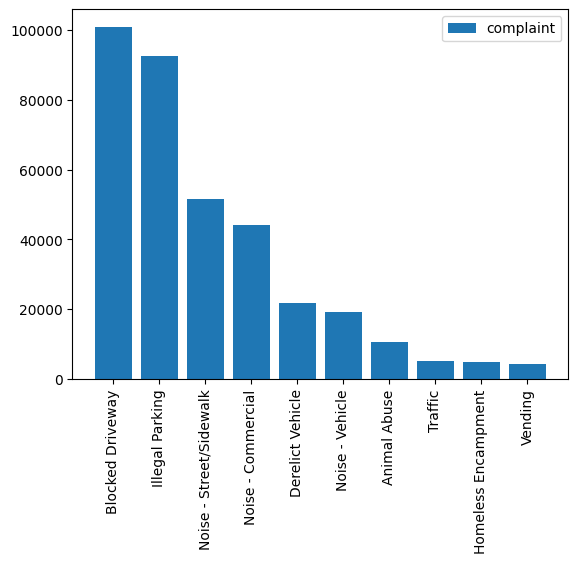

In [33]:
x=range(10)
plt.bar(top10.Complaint_Type, top10.FREQ)
##plt.xticks(x, df.Complaint_type)
plt.xticks(x, top10.Complaint_Type, rotation='vertical')
plt.legend(['complaint'])
plt.show()

In [34]:
f_read.dtypes

,0
Unique_Key,object
Created_Date,object
Closed_Date,object
Agency,object
Agency_Name,object
Complaint_Type,object
Descriptor,object
Location_Type,object
Incident_Zip,object
Incident_Address,object


### converting into date format

In [35]:
f_read['Created_Date'] =pd.to_datetime(f_read.Created_Date )
f_read['Closed_Date'] =pd.to_datetime(f_read.Closed_Date )
f_read['Due_Date'] =pd.to_datetime(f_read.Due_Date)
f_read['Resolution_Action_Upd_Date'] =pd.to_datetime(f_read.Resolution_Action_Updated_Date)

In [36]:
f_read['Call_closing_time'] =  (f_read['Closed_Date'] - f_read['Created_Date']).dt.seconds/3600
f_read['Resolution_time'] =  (f_read['Resolution_Action_Upd_Date'] - f_read['Created_Date']).dt.seconds/3600


In [37]:
f_read.isnull().sum()

,0
Unique_Key,0
Created_Date,0
Closed_Date,2381
Agency,0
Agency_Name,0
Complaint_Type,0
Descriptor,6501
Location_Type,133
Incident_Zip,2998
Incident_Address,51699


In [38]:
f_read["Address_Type"].unique()

array(['ADDRESS', nan, 'INTERSECTION', 'LATLONG', 'BLOCKFACE',
       'PLACENAME'], dtype=object)

In [39]:
f_read["Address_Type"].unique()
f_read["Address_Type"] = f_read["Address_Type"].mode()[0]

In [40]:
f_read['City']=f_read['City'].fillna('Unknown')
a=f_read['Facility_Type'].mode()[0]
f_read['Facility_Type']=f_read['Facility_Type'].fillna(a)
f_read['Location_Type']=f_read['Location_Type'].fillna(f_read['Facility_Type'].mode()[0])

#data_set['Facility_Type']=data_set['Facility_Type'].fillna(data_set['Facility_Type'].mode()[0])
#data_set['Location_Type']=data_set['Location_Type'].fillna(data_set['Location_Type'].mode()[0])

In [ ]:
##data_set=data_set.interpolate(method='time')
#data_set=data_set.fillna(method='ffill')

In [41]:
f_read.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Resolution_Action_Upd_Date,Call_closing_time,Resolution_time
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.86568154,-73.92350096,"(40.86568153633767, -73.92350095571744)",2016-01-01 00:55:00,0.933333,0.933333
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.77594531,-73.91509394,"(40.775945312321085, -73.91509393898605)",2016-01-01 01:26:00,1.450000,1.450000
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.87032452,-73.88852464,"(40.870324522111424, -73.88852464418646)",2016-01-01 04:51:00,4.866667,4.866667
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.83599405,-73.8283794,"(40.83599404683083, -73.82837939584206)",2016-01-01 07:43:00,7.766667,7.766667
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.73305962,-73.87416976,"(40.733059618956815, -73.87416975810375)",2016-01-01 03:24:00,3.466667,3.466667


In [42]:
f_read.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

In [43]:
data_set = f_read.loc[:,['Complaint_Type','Location_Type', 'Address_Type','Facility_Type','City','Status','Call_closing_time','Resolution_time']].copy()

In [44]:
data_set.head()

,Complaint_Type,Location_Type,Address_Type,Facility_Type,City,Status,Call_closing_time,Resolution_time
0,Noise - Street/Sidewalk,Street/Sidewalk,ADDRESS,Precinct,NEW YORK,Closed,0.933333,0.933333
1,Blocked Driveway,Street/Sidewalk,ADDRESS,Precinct,ASTORIA,Closed,1.450000,1.450000
2,Blocked Driveway,Street/Sidewalk,ADDRESS,Precinct,BRONX,Closed,4.866667,4.866667
3,Illegal Parking,Street/Sidewalk,ADDRESS,Precinct,BRONX,Closed,7.766667,7.766667
4,Illegal Parking,Street/Sidewalk,ADDRESS,Precinct,ELMHURST,Closed,3.466667,3.466667


In [45]:
lbe=LabelEncoder()

In [47]:
for col_name in data_set.columns:
  if data_set[col_name].isnull().sum() > 0:
    if data_set[col_name].dtype == 'object':
      data_set[col_name] = data_set[col_name].fillna(data_set[col_name].mode()[0])
    elif data_set[col_name].dtype in ['int64', 'float64']:
      data_set[col_name] = data_set[col_name].fillna(data_set[col_name].median())

In [49]:
for col_name in data_set.columns:
  if data_set[col_name].dtype == "object":
    data_set[col_name] = lbe.fit_transform(data_set[col_name])

In [50]:
#data_set['Agency']=lbe.fit_transform(data_set['Agency'])
data_set['Complaint_Type']=lbe.fit_transform(data_set['Complaint_Type'])
data_set['Location_Type']=lbe.fit_transform(data_set['Location_Type'])
data_set['Address_Type']=lbe.fit_transform(data_set['Address_Type'])
data_set['City']=lbe.fit_transform(data_set['City'])
data_set['Facility_Type']=lbe.fit_transform(data_set['Facility_Type'])
data_set['Status']=lbe.fit_transform(data_set['Status'])

In [51]:
data_set.head()

,Complaint_Type,Location_Type,Address_Type,Facility_Type,City,Status,Call_closing_time,Resolution_time
0,16,15,0,0,33,1,0.933333,0.933333
1,4,15,0,0,1,1,1.450000,1.450000
2,4,15,0,0,6,1,4.866667,4.866667
3,12,15,0,0,6,1,7.766667,7.766667
4,12,15,0,0,13,1,3.466667,3.466667


In [52]:
data_set.describe()

,Complaint_Type,Location_Type,Address_Type,Facility_Type,City,Status,Call_closing_time,Resolution_time
count,364558.000000,364558.00000,364558.0,364558.0,364558.000000,364558.000000,364558.000000,364558.000000
mean,10.271307,13.88279,0.0,0.0,19.757262,1.006803,3.852335,3.851243
std,5.301311,3.42997,0.0,0.0,15.153827,0.141963,3.774441,3.774319
min,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.000000,15.00000,0.0,0.0,7.000000,1.000000,1.266667,1.266667
50%,12.000000,15.00000,0.0,0.0,11.000000,1.000000,2.650000,2.650000
75%,13.000000,15.00000,0.0,0.0,33.000000,1.000000,5.150000,5.150000
max,23.000000,18.00000,0.0,0.0,53.000000,3.000000,23.983333,23.983333


In [53]:
data_set.dtypes

,0
Complaint_Type,int64
Location_Type,int64
Address_Type,int64
Facility_Type,int64
City,int64
Status,int64
Call_closing_time,float64
Resolution_time,float64


In [54]:
data_set["Time_bucket"]= np.where(data_set["Resolution_time"]<1,0,
                                 np.where(data_set["Resolution_time"]<3,1,
                                         np.where(data_set["Resolution_time"]<6,2,
                                                 np.where(data_set["Resolution_time"]<10,3,
                                                         np.where(data_set["Resolution_time"]<12,4,
                                                                 np.where(data_set["Resolution_time"]<24,5,
                                                                         np.where(data_set["Resolution_time"]<36,6,7))
                                                                 )))))

In [55]:
data_set.isnull().sum()

,0
Complaint_Type,0
Location_Type,0
Address_Type,0
Facility_Type,0
City,0
Status,0
Call_closing_time,0
Resolution_time,0
Time_bucket,0


In [56]:
data_set['Call_closing_time']=data_set['Call_closing_time'].fillna(data_set['Call_closing_time'].median())

In [57]:
data_set['Resolution_time']=data_set['Resolution_time'].fillna(data_set['Resolution_time'].median())

In [58]:
#x_train=data_set.drop(['Resolution_time'],axis=1)
#y_train=data_set['Resolution_time']
x=data_set.iloc[:,0:8]
y=data_set.iloc[:,8]

In [59]:
x

,Complaint_Type,Location_Type,Address_Type,Facility_Type,City,Status,Call_closing_time,Resolution_time
0,16,15,0,0,33,1,0.933333,0.933333
1,4,15,0,0,1,1,1.450000,1.450000
2,4,15,0,0,6,1,4.866667,4.866667
3,12,15,0,0,6,1,7.766667,7.766667
4,12,15,0,0,13,1,3.466667,3.466667
...,...,...,...,...,...,...,...,...
364553,12,15,0,0,51,1,10.300000,10.300000
364554,17,15,0,0,6,1,2.350000,2.350000
364555,16,15,0,0,33,1,0.316667,0.316667
364556,4,15,0,0,6,1,2.683333,2.683333


In [60]:
x.isnull().sum()

,0
Complaint_Type,0
Location_Type,0
Address_Type,0
Facility_Type,0
City,0
Status,0
Call_closing_time,0
Resolution_time,0


In [61]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(255190, 8)
(255190,)
(109368, 8)
(109368,)


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_train=ss.fit_transform(xtrain)
x_test=ss.fit_transform(xtest)

In [63]:
import math
print(len(y))
math.sqrt(len(ytest))

364558


330.7083307084961

In [64]:
catogory= KNeighborsClassifier(n_neighbors=20)
catogory.fit(x_train,ytrain)

KNeighborsClassifier(n_neighbors=20)

In [65]:
ypredict=catogory.predict(x_test)
print(ypredict)

[2 2 2 ... 0 1 3]


In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypredict)

0.989466754443713

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

In [68]:
clf.fit(x_train,ytrain)

RandomForestClassifier(random_state=42)

In [69]:
y_pred = clf.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics

In [71]:
conf_mat = confusion_matrix(ytest, y_pred)

In [72]:
print("model accuracy:", accuracy_score(ytest, y_pred)* 100)

model accuracy: 99.35995903737839


In [73]:
f_read['Created_Date'].dt.date

,Created_Date
0,2015-12-31
1,2015-12-31
2,2015-12-31
3,2015-12-31
4,2015-12-31
...,...
364553,2015-01-01
364554,2015-01-01
364555,2015-01-01
364556,2015-01-01


In [74]:
f_read.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Resolution_Action_Upd_Date,Call_closing_time,Resolution_time
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.86568154,-73.92350096,"(40.86568153633767, -73.92350095571744)",2016-01-01 00:55:00,0.933333,0.933333
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.77594531,-73.91509394,"(40.775945312321085, -73.91509393898605)",2016-01-01 01:26:00,1.450000,1.450000
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.87032452,-73.88852464,"(40.870324522111424, -73.88852464418646)",2016-01-01 04:51:00,4.866667,4.866667
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.83599405,-73.8283794,"(40.83599404683083, -73.82837939584206)",2016-01-01 07:43:00,7.766667,7.766667
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.73305962,-73.87416976,"(40.733059618956815, -73.87416975810375)",2016-01-01 03:24:00,3.466667,3.466667


In [75]:
df=compaint_analysis.to_frame().reset_index()

In [76]:
Time_series_df = f_read.groupby(f_read['Created_Date'].dt.date).size()

In [77]:
time_se = Time_series_df.to_frame().reset_index()

In [78]:
time_se.columns = ["day","count"]

In [79]:
time_se.isna().sum()

,0
day,0
count,0


In [80]:
print(time_se.head() )
time_se.tail()

          day  count
0  2015-01-01    675
1  2015-01-02    672
2  2015-01-03    691
3  2015-01-04    689
4  2015-01-05    665


,day,count
360,2015-12-27,905
361,2015-12-28,809
362,2015-12-29,830
363,2015-12-30,865
364,2015-12-31,880


In [ ]:
## from 01-jan-2015  till 31-dec-2015 everyday complaints had been reported.

In [81]:
time_se.dtypes

,0
day,object
count,int64


In [82]:
time_se["day"] =pd.to_datetime(time_se["day"])

In [83]:
time_se.set_index("day", inplace = True)

In [84]:
time_se.head()

,count
day,
2015-01-01,675
2015-01-02,672
2015-01-03,691
2015-01-04,689
2015-01-05,665


<Axes: xlabel='day'>

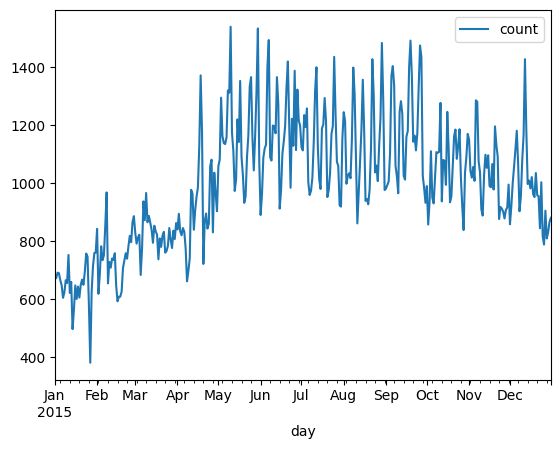

In [85]:
## plotting of the crime count against the date
time_se.plot()

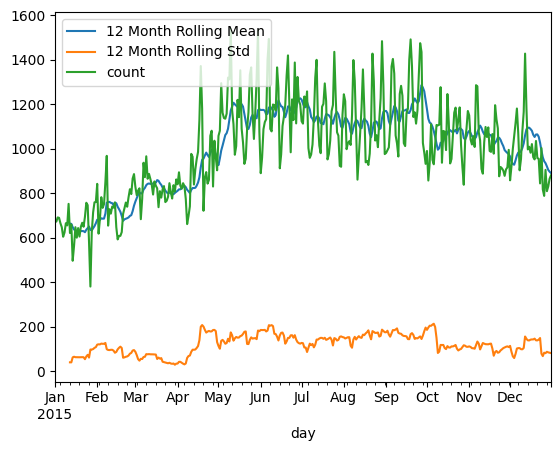

In [86]:
timeseries = time_se['count']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend(loc='best')

<Figure size 640x480 with 0 Axes>

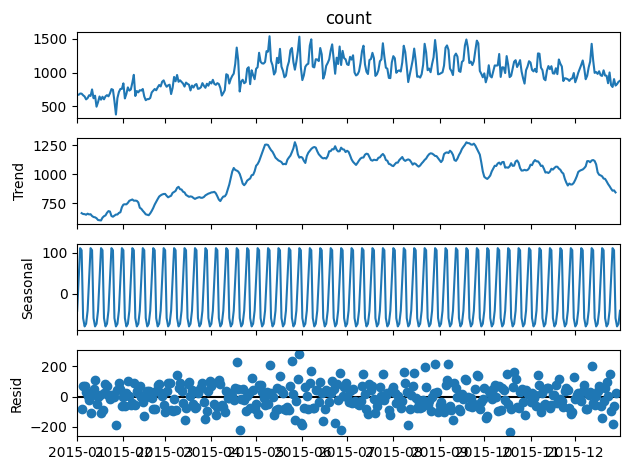

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(time_se['count'])
fig = plt.figure()
fig = decomposition.plot()


In [88]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(timeseries)
result

(np.float64(-2.0792476458919977),
 np.float64(0.25294067957638017),
 13,
 351,
 {'1%': np.float64(-3.44911857009962),
  '5%': np.float64(-2.8698097654570507),
  '10%': np.float64(-2.5711757061225153)},
 np.float64(4221.601886007954))

In [89]:
#Mathematically testing stationarity by agumented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
#Creating function for later use
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [90]:
adf_check(time_se["count"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.0792476458919977
p-value : 0.25294067957638017
#Lags Used : 13
Number of Observations Used : 351
weak evidence against null hypothesis, time series is non-stationary 


In [91]:
time_se['count'].shift(1)

,count
day,
2015-01-01,NaN
2015-01-02,675.0
2015-01-03,672.0
2015-01-04,691.0
2015-01-05,689.0
...,...
2015-12-27,788.0
2015-12-28,905.0
2015-12-29,809.0


In [92]:
time_se['count_first_diff'] = time_se['count'] - time_se['count'].shift(1)

In [93]:
time_se.head()

,count,count_first_diff
day,,
2015-01-01,675,NaN
2015-01-02,672,-3.0
2015-01-03,691,19.0
2015-01-04,689,-2.0
2015-01-05,665,-24.0


<Axes: xlabel='day'>

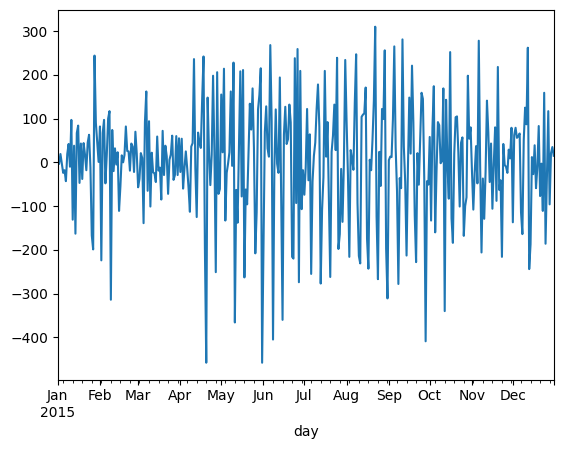

In [94]:
time_se.count_first_diff.plot()

In [95]:
adf_check(time_se['count_first_diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.209768555517968
p-value : 1.9016230790744734e-15
#Lags Used : 12
Number of Observations Used : 351
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary
